In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
uber = pd.read_csv("uber.csv")
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71466 entries, 0 to 71465
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         71466 non-null  int64  
 1   key                71465 non-null  object 
 2   fare_amount        71465 non-null  float64
 3   pickup_datetime    71465 non-null  object 
 4   pickup_longitude   71465 non-null  float64
 5   pickup_latitude    71465 non-null  float64
 6   dropoff_longitude  71465 non-null  float64
 7   dropoff_latitude   71465 non-null  float64
 8   passenger_count    71465 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 4.9+ MB


In [7]:
uber.drop(["key", "pickup_datetime"], axis=1, inplace=True)

In [8]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,7.146600e+04,71465.000000,71465.000000,71465.000000,71465.000000,71465.000000,71465.000000
mean,2.770109e+07,11.369363,-72.552753,39.946339,-72.565751,39.944831,1.675995
std,1.601735e+07,9.918296,10.936267,6.391720,10.563282,6.069283,1.297039
min,4.800000e+01,-5.000000,-748.016667,-74.015515,-737.916665,-74.009465,0.000000
25%,1.384615e+07,6.000000,-73.992086,40.734776,-73.991446,40.733673,1.000000
50%,2.765386e+07,8.500000,-73.981821,40.752545,-73.980143,40.752975,1.000000
75%,4.151441e+07,12.500000,-73.967252,40.767110,-73.963777,40.768088,2.000000
max,5.542169e+07,350.000000,40.808425,404.433332,40.828377,45.031598,6.000000


In [9]:
from sklearn.impute import SimpleImputer
fill_median = SimpleImputer(strategy="median")
fill_median.fit(uber)

SimpleImputer(strategy='median')

In [10]:
uber_tr = fill_median.transform(uber)

In [11]:
uber_preprocessed = pd.DataFrame(uber_tr, columns=uber.columns)

In [12]:
uber_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71466 entries, 0 to 71465
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         71466 non-null  float64
 1   fare_amount        71466 non-null  float64
 2   pickup_longitude   71466 non-null  float64
 3   pickup_latitude    71466 non-null  float64
 4   dropoff_longitude  71466 non-null  float64
 5   dropoff_latitude   71466 non-null  float64
 6   passenger_count    71466 non-null  float64
dtypes: float64(7)
memory usage: 3.8 MB


In [13]:
uber_preprocessed.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,7.146600e+04,71466.000000,71466.000000,71466.000000,71466.000000,71466.000000,71466.000000
mean,2.770109e+07,11.369323,-72.552773,39.946350,-72.565771,39.944842,1.675986
std,1.601735e+07,9.918232,10.936192,6.391676,10.563209,6.069242,1.297033
min,4.800000e+01,-5.000000,-748.016667,-74.015515,-737.916665,-74.009465,0.000000
25%,1.384615e+07,6.000000,-73.992086,40.734776,-73.991446,40.733673,1.000000
50%,2.765386e+07,8.500000,-73.981821,40.752545,-73.980143,40.752975,1.000000
75%,4.151441e+07,12.500000,-73.967252,40.767110,-73.963777,40.768088,2.000000
max,5.542169e+07,350.000000,40.808425,404.433332,40.828377,45.031598,6.000000


In [14]:
corr_matrix = uber_preprocessed.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

fare_amount          1.000000
dropoff_longitude    0.019533
pickup_longitude     0.016528
passenger_count      0.008824
Unnamed: 0           0.004265
pickup_latitude     -0.017915
dropoff_latitude    -0.019877
Name: fare_amount, dtype: float64

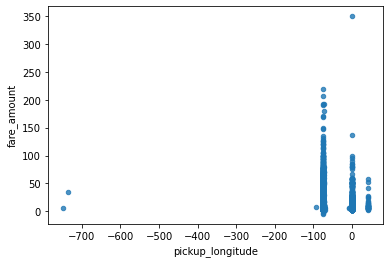

In [15]:
uber_preprocessed.plot(kind="scatter", x="pickup_longitude", y="fare_amount", alpha=0.8)

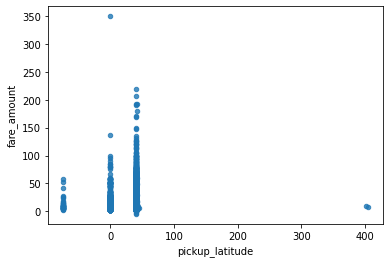

In [16]:
uber_preprocessed.plot(kind="scatter", x="pickup_latitude", y="fare_amount", alpha=0.8)

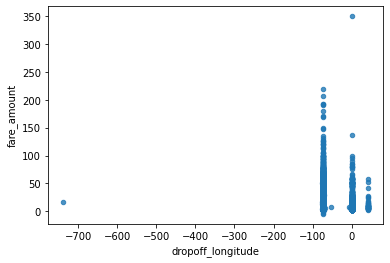

In [17]:
uber_preprocessed.plot(kind="scatter", x="dropoff_longitude", y="fare_amount", alpha=0.8)

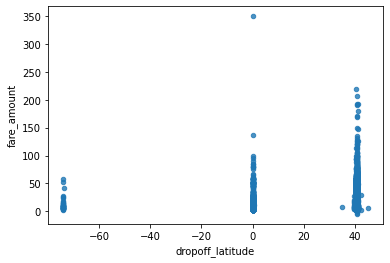

In [18]:
uber_preprocessed.plot(kind="scatter", x="dropoff_latitude", y="fare_amount", alpha=0.8)



In [19]:
uber_features = uber_preprocessed.drop("fare_amount", axis=1).copy()
uber_labels = uber_preprocessed["fare_amount"].copy()

In [20]:
uber_labels.shape

(71466,)

In [21]:
uber_features.shape

(71466, 6)

In [22]:
uber_features.shape

(71466, 6)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
uber_scaled_features = scaler.fit_transform(uber_features)

In [24]:
uber_scaled_features

array([[-0.21619827, -0.13231788,  0.12391264, -0.13573058,  0.12825002,
        -0.52118232],
       [ 0.00837256, -0.13181844,  0.12232795, -0.13527601,  0.13271651,
        -0.52118232],
       [ 1.0790411 , -0.13279575,  0.12429068, -0.13223288,  0.13639442,
        -0.52118232],
       ...,
       [ 1.4643858 , -0.13150663,  0.1232138 , -0.13515417,  0.12932347,
         2.56280161],
       [-0.10240058, -0.12972263,  0.12552119, -0.13154852,  0.13764418,
        -0.52118232],
       [-1.7279369 , -0.13067233,  0.12613293, -0.13389697,  0.13315314,
        -0.52118232]])

In [25]:
from sklearn.model_selection import train_test_split
uber_feature_train, uber_feature_test , uber_label_train, uber_label_test = train_test_split(uber_scaled_features, uber_labels, test_size=0.2, random_state=42)

In [26]:
uber_feature_train.shape

(57172, 6)

In [27]:
uber_feature_test.shape

(14294, 6)

In [28]:
uber_label_train.shape

(57172,)

In [29]:
uber_label_test.shape

(14294,)

In [30]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(uber_feature_train, uber_label_train)

LinearRegression()

In [31]:
predicted_values = lin_model.predict(uber_feature_test)

In [34]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(uber_label_test, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.162425838951679

In [35]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(uber_label_test, predicted_values)
lin_r2

-0.0002281804453063696

In [36]:
from sklearn.ensemble import RandomForestRegressor
rand_model = RandomForestRegressor()
rand_model.fit(uber_feature_train, uber_label_train)

RandomForestRegressor()

In [37]:
predicted_values_rand = rand_model.predict(uber_feature_test)

In [38]:
rand_mse = mean_squared_error(uber_label_test, predicted_values_rand)
rand_rmse = np.sqrt(rand_mse)
rand_rmse

5.174084139966153

In [39]:
rand_r2 = r2_score(uber_label_test, predicted_values_rand)
rand_r2

0.740718648805428